In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from dataloader_module import load_data

In [2]:
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)


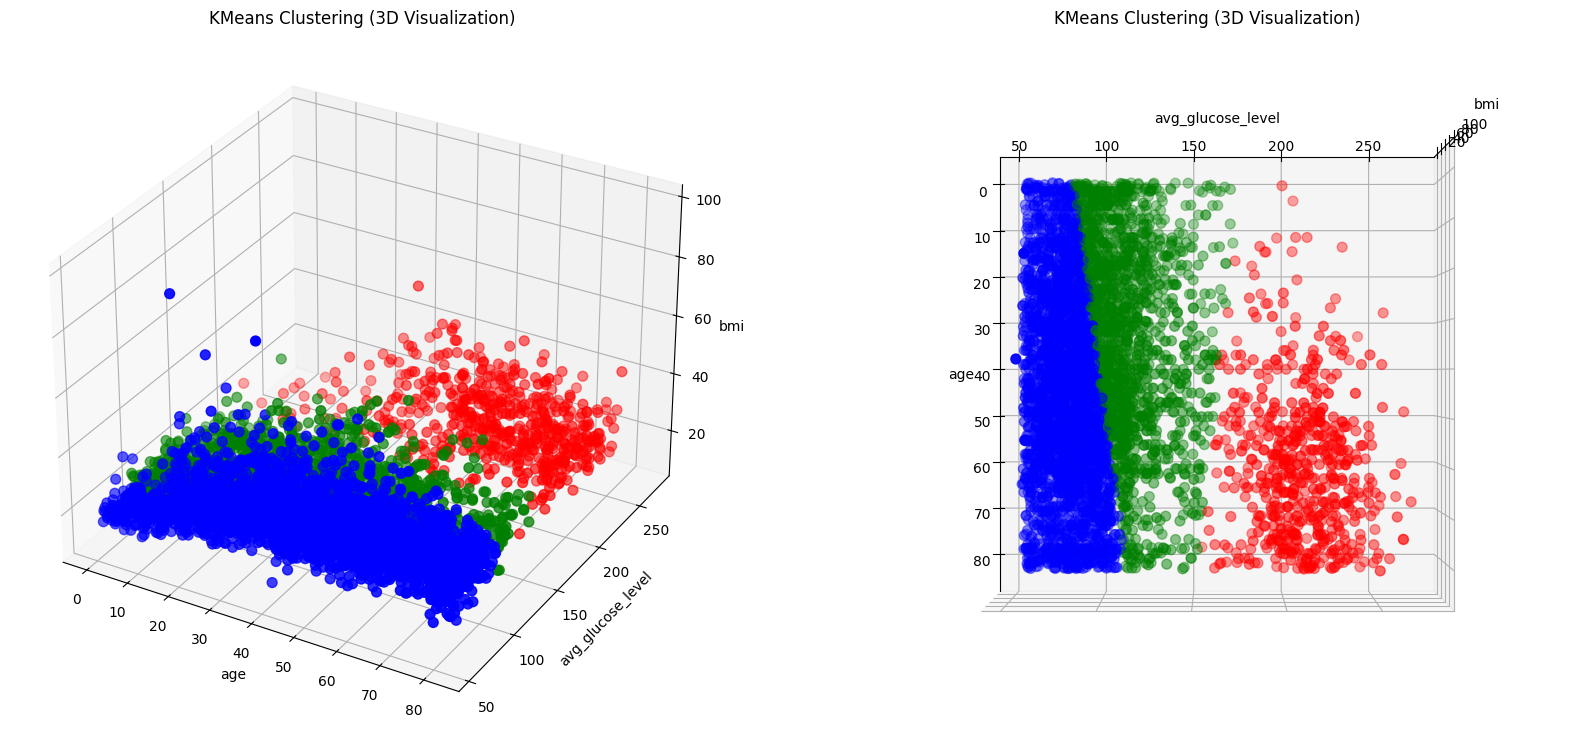

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from graphs_module import cluster_3d

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df = X.copy()
df['stroke'] = y
labels = kmeans.labels_
df['cluster'] = labels

colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'black', 6: 'brown', 7: 'pink', 8: 'gray', 9: 'olive'}

cluster_3d(X, y, labels, ["age", "avg_glucose_level", "bmi"], colors)

In [4]:
cluster_means = df.groupby('cluster')['stroke'].mean().sort_values(ascending=False)

high_risk_clusters = cluster_means.index.tolist()

# Relacionar cada número con un color y mostrar el valor calculado
for cluster in high_risk_clusters:
    color = colors.get(cluster, 'unknown')
    mean_value = cluster_means[cluster]
    print(f"Cluster {cluster} (Color: {color}) - Stroke Mean: {mean_value:.4f}")

print("Clusters ordered by stroke mean (high to low):", high_risk_clusters)


Cluster 1 (Color: red) - Stroke Mean: 0.1304
Cluster 0 (Color: blue) - Stroke Mean: 0.0358
Cluster 2 (Color: green) - Stroke Mean: 0.0213
Clusters ordered by stroke mean (high to low): [1, 0, 2]
